# Tarea 1 - Ejercicio 2

#### **Datos:** Table of experimental rates of ammonia oxidation, nitrite oxidation, nitrate reduction, and nitrite uptake from the Eastern Tropical North Pacific Ocean

#### **Equipo:**

- Diana Isabel Muñoz Castillo
- Luis Rodrigo Nieto Pizano
- Adaya Isui Escobar Fortis

#### **Entrega:** Viernes 27/09/24

### Importación de librerías

1. **`os`**: 
   - Se utiliza para interactuar con el sistema operativo, permitiendo la gestión de archivos y directorios. Es útil para configurar el entorno de trabajo, como la carga y el almacenamiento de archivos.

2. **`pandas`**:
   - Librería esencial para la manipulación y análisis de datos estructurados. Facilita la carga, limpieza y transformación de datos a través de estructuras como DataFrames y Series, que son fundamentales para preparar los datos antes de aplicar técnicas de machine learning.

3. **`numpy`**:
   - Proporciona soporte para operaciones matemáticas avanzadas y la manipulación de arreglos multidimensionales. Es crucial para cálculos eficientes y precisos en el procesamiento de datos.

4. **`seaborn` y `matplotlib.pyplot`**:
   - Herramientas de visualización de datos. `seaborn` ofrece gráficos estadísticos más atractivos y fáciles de interpretar, mientras que `matplotlib` permite personalizar gráficos y visualizaciones detalladas. Ayudan a explorar y entender la distribución y relaciones de los datos.

5. **`sklearn.model_selection`**:
   - Contiene funciones como `train_test_split` para dividir el conjunto de datos en entrenamiento y prueba, garantizando una evaluación imparcial del modelo. `cross_val_score` se utiliza para realizar validación cruzada, evaluando el modelo de manera más robusta.

6. **`sklearn.preprocessing`**:
   - `LabelEncoder` convierte etiquetas categóricas en valores numéricos, necesario para aplicar muchos algoritmos de machine learning que requieren variables objetivo numéricas.

7. **`sklearn.metrics`**:
   - Proporciona métricas para evaluar el rendimiento de los modelos, como `accuracy_score` para medir la precisión y `classification_report` para obtener un informe detallado con métricas como precisión, recall y F1-score para cada clase.

8. **`sklearn.neighbors`**:
   - Implementa el algoritmo K-Nearest Neighbors, que clasifica instancias basándose en la cercanía de los datos de entrenamiento. Es útil para problemas de clasificación y regresión.

9. **`sklearn.naive_bayes`**:
   - `GaussianNB` asume que las características siguen una distribución gaussiana y utiliza esta suposición para clasificar instancias nuevas de manera eficiente.

10. **`sklearn.decomposition`**:
    - `PCA` (Análisis de Componentes Principales) se utiliza para reducir la dimensionalidad de los datos, manteniendo la mayor cantidad de variabilidad posible. Ayuda a visualizar y preprocesar datos antes de aplicar otros modelos.

11. **`sklearn.cluster`**:
    - `KMeans` es un algoritmo de agrupamiento no supervisado que segmenta los datos en grupos o clusters basados en su similitud, identificando patrones ocultos en datos no etiquetados.

12. **`sklearn.discriminant_analysis`**:
    - `LinearDiscriminantAnalysis` (LDA) busca proyectar los datos en un espacio donde las clases sean lo más separadas posible. Es útil para problemas de clasificación supervisada y reducción de dimensionalidad.

13. **`scipy.stats`**:
    - Proporciona herramientas estadísticas y funciones científicas avanzadas, como pruebas estadísticas y generación de distribuciones. Complementa la funcionalidad de `numpy` y `pandas` en el análisis de datos.

Estas librerías forman el núcleo del ecosistema de ciencia de datos en Python, permitiendo la manipulación, visualización, modelado y evaluación de datos para obtener insights valiosos y construir modelos predictivos efectivos.

In [80]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

### Carga y preparación de los datos

A continuación se carga el conjunto de datos, se extrae información relevante de las unidades, se limpia el DataFrame eliminando filas innecesarias y verificamos el contenido de los datos para el análisis posterior.


In [81]:
os.getcwd()

'd:\\MultivariateMethods\\Homeworks'

In [82]:
df_experiment = pd.read_csv("D:\MultivariateMethods\Data\Experimental light and nitrate rate measurements ETNP_units.csv")

In [83]:
df_experiment.head()

,Sample,Cruise,Expt,Depth,Light,Treatment_2,Station,Cast,Longitude,Latitude,...,SE_3,NO2.up,NO3.up,NH3.up,PNM_depth,PNM_max,Chl_max,Chl_depth,NitPNM,Nitracline_top
0,#,ID,ID,m,condition,ID,ID,#,deg W,deg N,...,nmol/L/day,nmol/L/day,nmol/L/day,nmol/L/day,m,umol/L,mg/m3,m,umol/L,m
1,1,Ward,RM1,60,DK,Filtered,PS1,17,113.00,10.00,...,2.27,NaN,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
2,2,Ward,RM1,60,DK,Ambient,PS1,17,113.00,10.00,...,0.88,4.16,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
3,3,Ward,RM1,60,LL,Ambient,PS1,17,113.00,10.00,...,0.16,5.44,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
4,4,Ward,RM1,60,ML,Ambient,PS1,17,113.00,10.00,...,0.21,7.08,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN


In [84]:
len(df_experiment)

88

In [85]:
units_dict = df_experiment.iloc[0].to_dict()
df_experiment = df_experiment.drop(0).reset_index(drop=True)
print(units_dict)

{'Sample': '#', 'Cruise': 'ID', 'Expt': 'ID', 'Depth': 'm', 'Light': 'condition', 'Treatment_2': 'ID', 'Station': 'ID', 'Cast': '#', 'Longitude': 'deg W', 'Latitude': 'deg N', 'SigmaT': 'kg/m3', 'Salinity': 'PSU', 'Temp': 'deg C', 'Oxygen': 'umol/L', 'NO2': 'umol/L', 'NO3': 'umol/L', 'NH4': 'nmol/L', 'Chl_SP': 'mg/m3', 'pPAR': '%', 'Inc.PAR': '%', 'NH3.Ox.12': 'nmol/L/day', 'Stdev_4': 'nmol/L/day', 'SE_4': 'nmol/L/day', 'NO2.Ox.12': 'nmol/L/day', 'Stdev_2': 'nmol/L/day', 'SE_2': 'nmol/L/day', 'NO3.Red.12': 'nmol/L/day', 'Stdev_3': 'nmol/L/day', 'SE_3': 'nmol/L/day', 'NO2.up': 'nmol/L/day', 'NO3.up': 'nmol/L/day', 'NH3.up': 'nmol/L/day', 'PNM_depth': 'm', 'PNM_max': 'umol/L', 'Chl_max': 'mg/m3', 'Chl_depth': 'm', 'NitPNM': 'umol/L', 'Nitracline_top': 'm'}


In [86]:
units_dict

{'Sample': '#',
 'Cruise': 'ID',
 'Expt': 'ID',
 'Depth': 'm',
 'Light': 'condition',
 'Treatment_2': 'ID',
 'Station': 'ID',
 'Cast': '#',
 'Longitude': 'deg W',
 'Latitude': 'deg N',
 'SigmaT': 'kg/m3',
 'Salinity': 'PSU',
 'Temp': 'deg C',
 'Oxygen': 'umol/L',
 'NO2': 'umol/L',
 'NO3': 'umol/L',
 'NH4': 'nmol/L',
 'Chl_SP': 'mg/m3',
 'pPAR': '%',
 'Inc.PAR': '%',
 'NH3.Ox.12': 'nmol/L/day',
 'Stdev_4': 'nmol/L/day',
 'SE_4': 'nmol/L/day',
 'NO2.Ox.12': 'nmol/L/day',
 'Stdev_2': 'nmol/L/day',
 'SE_2': 'nmol/L/day',
 'NO3.Red.12': 'nmol/L/day',
 'Stdev_3': 'nmol/L/day',
 'SE_3': 'nmol/L/day',
 'NO2.up': 'nmol/L/day',
 'NO3.up': 'nmol/L/day',
 'NH3.up': 'nmol/L/day',
 'PNM_depth': 'm',
 'PNM_max': 'umol/L',
 'Chl_max': 'mg/m3',
 'Chl_depth': 'm',
 'NitPNM': 'umol/L',
 'Nitracline_top': 'm'}

In [87]:
df_experiment.head()

,Sample,Cruise,Expt,Depth,Light,Treatment_2,Station,Cast,Longitude,Latitude,...,SE_3,NO2.up,NO3.up,NH3.up,PNM_depth,PNM_max,Chl_max,Chl_depth,NitPNM,Nitracline_top
0,1,Ward,RM1,60,DK,Filtered,PS1,17,113.00,10.00,...,2.27,NaN,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
1,2,Ward,RM1,60,DK,Ambient,PS1,17,113.00,10.00,...,0.88,4.16,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
2,3,Ward,RM1,60,LL,Ambient,PS1,17,113.00,10.00,...,0.16,5.44,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
3,4,Ward,RM1,60,ML,Ambient,PS1,17,113.00,10.00,...,0.21,7.08,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN
4,5,Ward,RM1,60,HL,Ambient,PS1,17,113.00,10.00,...,0.30,5.93,NaN,NaN,55.00,1.49,3.16,58.00,NaN,NaN


### Análisis exploratorio de datos y preprocesamiento

A continuación realiza un análisis exploratorio y limpieza de datos integral, asegurando que los datos estén listos para un análisis más profundo y la construcción de modelos predictivos. Las visualizaciones permiten comprender mejor las características de los datos y guiar las decisiones de preprocesamiento.

In [88]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sample          86 non-null     object
 1   Cruise          86 non-null     object
 2   Expt            86 non-null     object
 3   Depth           86 non-null     object
 4   Light           86 non-null     object
 5   Treatment_2     86 non-null     object
 6   Station         86 non-null     object
 7   Cast            86 non-null     object
 8   Longitude       86 non-null     object
 9   Latitude        86 non-null     object
 10  SigmaT          86 non-null     object
 11  Salinity        86 non-null     object
 12  Temp            86 non-null     object
 13  Oxygen          86 non-null     object
 14  NO2             86 non-null     object
 15  NO3             86 non-null     object
 16  NH4             86 non-null     object
 17  Chl_SP          86 non-null     object
 18  pPAR        

In [89]:
df_experiment=df_experiment.drop(['Sample'],axis=1)

In [90]:
# Convert columns that should be numeric to numeric types (forcing conversion of errors to NaN)
columns_to_convert = ['Depth', 'Station', 'Cast', 'Longitude', 'Latitude', 'SigmaT', 'Salinity', 'Temp', 'Oxygen', 'NO2', 'NO3', 'NH4', 'Chl_SP', 'pPAR', 'Inc.PAR', 'NH3.Ox.12',
       'Stdev_4', 'SE_4', 'NO2.Ox.12', 'Stdev_2', 'SE_2', 'NO3.Red.12',
       'Stdev_3', 'SE_3', 'NO2.up', 'NO3.up', 'NH3.up', 'PNM_depth', 'PNM_max',
       'Chl_max', 'Chl_depth', 'NitPNM', 'Nitracline_top']
df_experiment[columns_to_convert] = df_experiment[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Separate numeric and categorical columns
numeric_cols = df_experiment.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_experiment.select_dtypes(include=['object']).columns

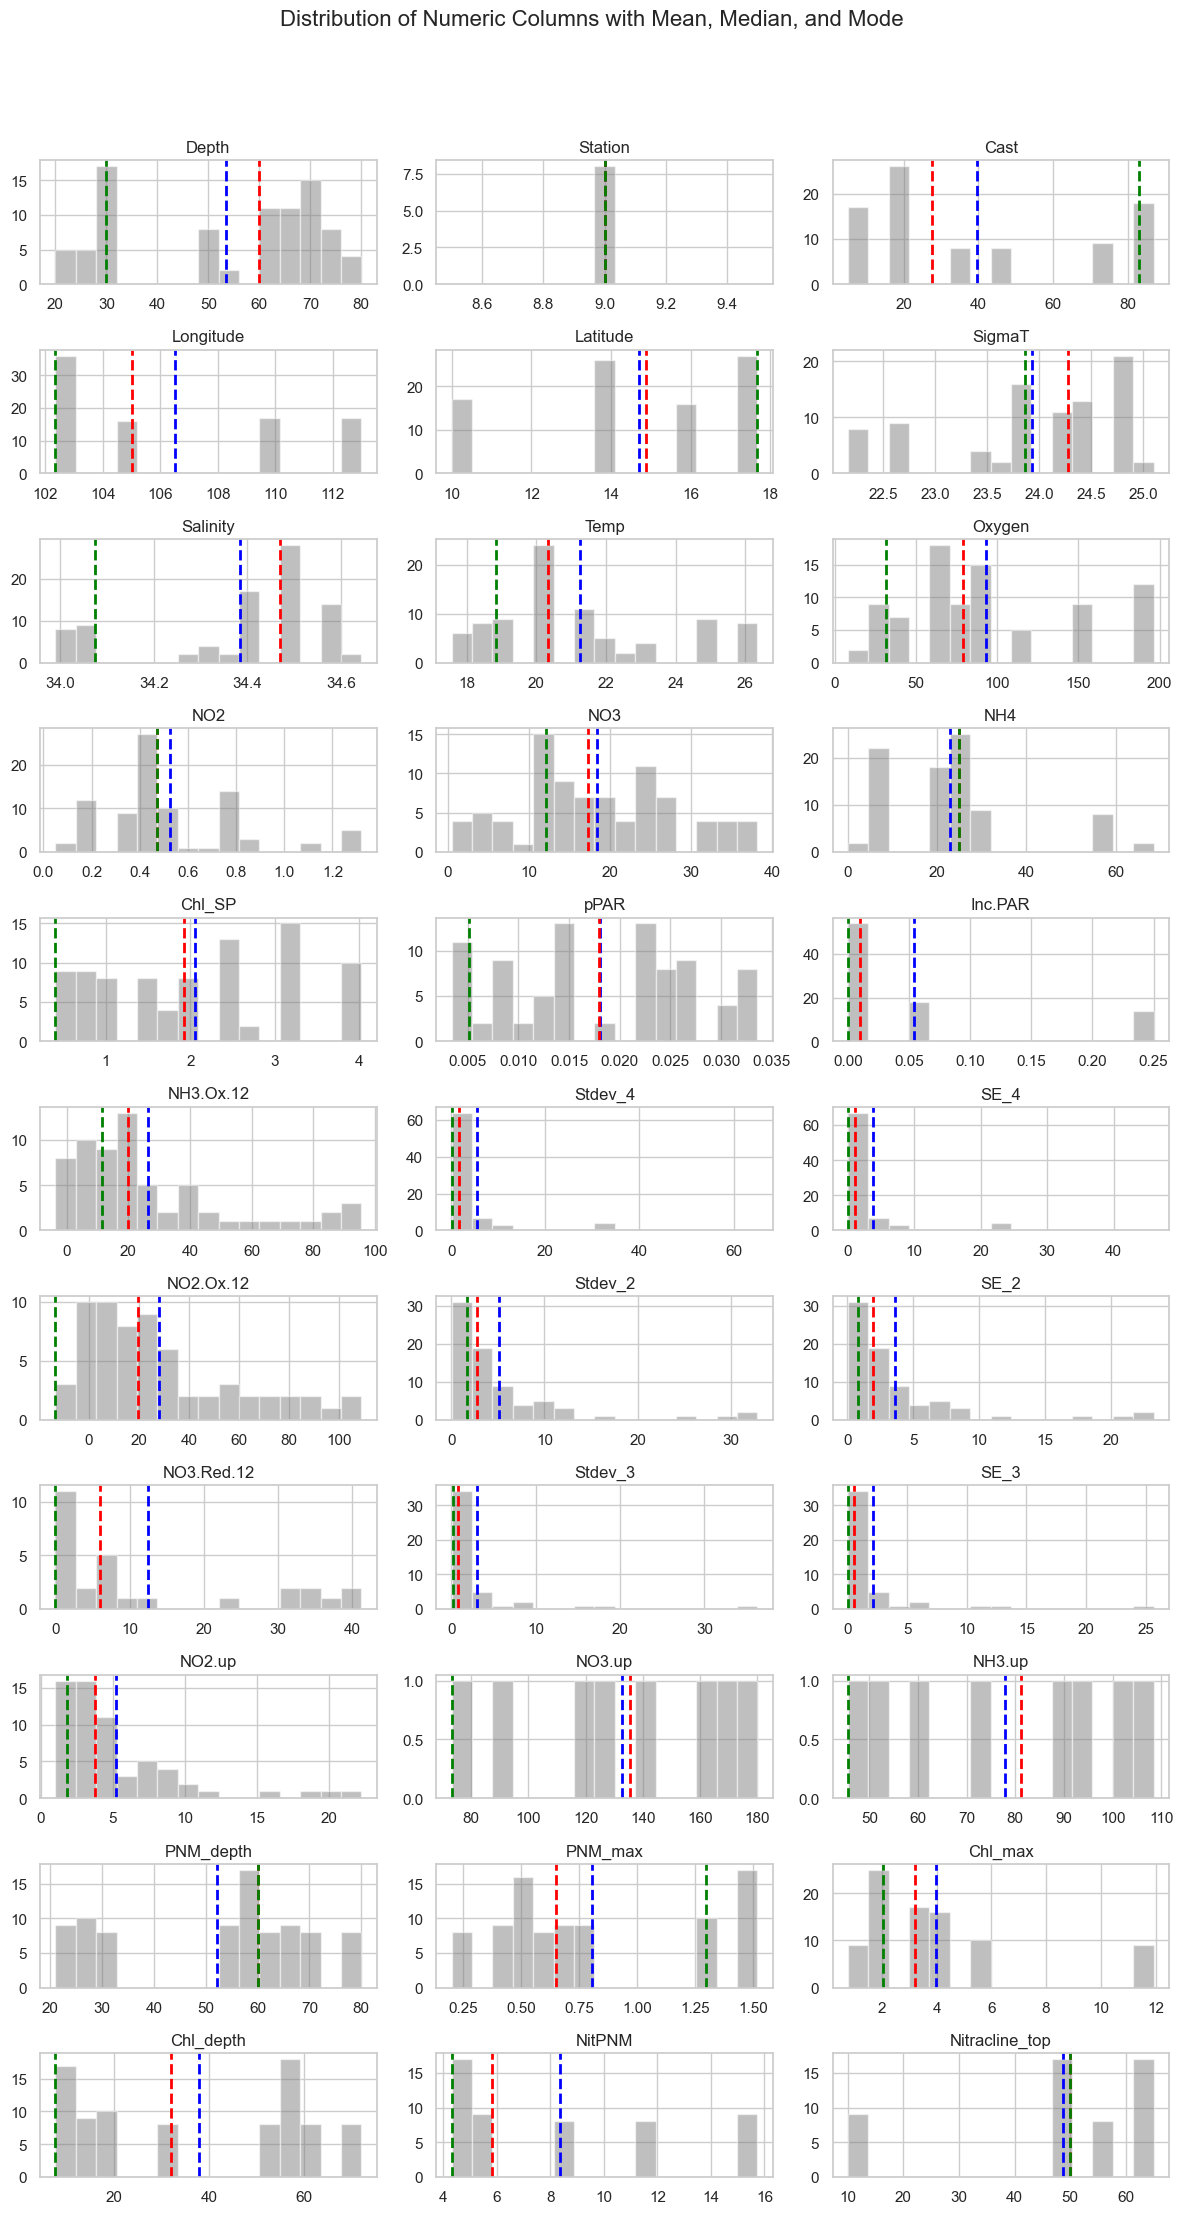

In [91]:
# Ajustar el tamaño de los gráficos
plt.figure(figsize=(12, 25))

# Iterar sobre las columnas numéricas
for i, col in enumerate(numeric_cols):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i + 1)
    df_experiment[col].hist(bins=15, alpha=0.5, color='gray')

    # Calcular media, mediana y moda
    mean_value = df_experiment[col].mean()
    median_value = df_experiment[col].median()
    mode_value = df_experiment[col].mode()[0]  # La moda puede devolver múltiples valores, seleccionamos el primero

    # Agregar las líneas de colores
    plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.axvline(mode_value, color='green', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value:.2f}')
    
    plt.title(col)

plt.suptitle('Distribution of Numeric Columns with Mean, Median, and Mode', size=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar para que el título no se superponga
plt.show()

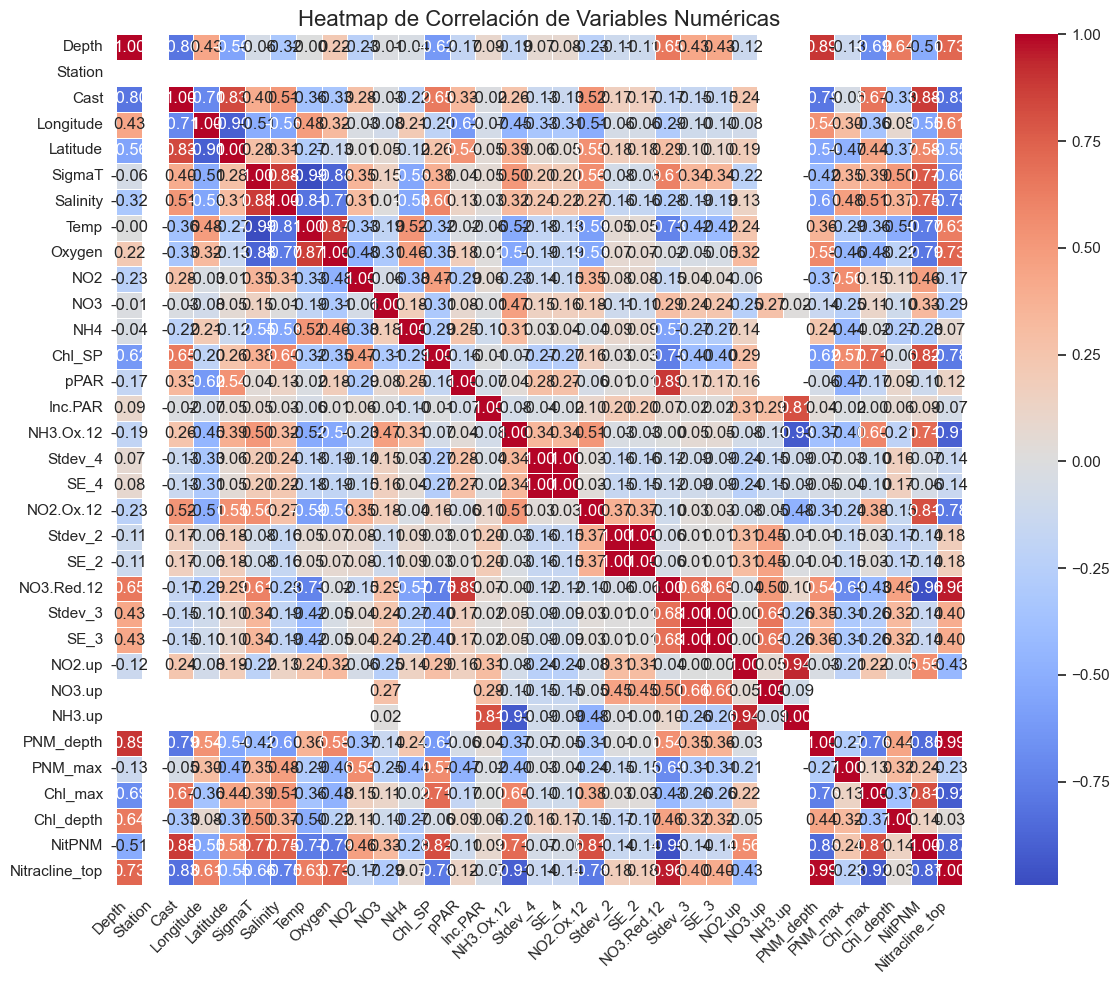

In [92]:
# Calcular la matriz de correlación
correlation_matrix = df_experiment[numeric_cols].corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Crear el heatmap con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Título y etiquetas del gráfico
plt.title('Heatmap de Correlación de Variables Numéricas', size=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Ajustar el gráfico para evitar solapamiento
plt.show()

In [93]:
df_experiment = df_experiment.drop(['SE_4','SE_2','SE_3'],axis=1)

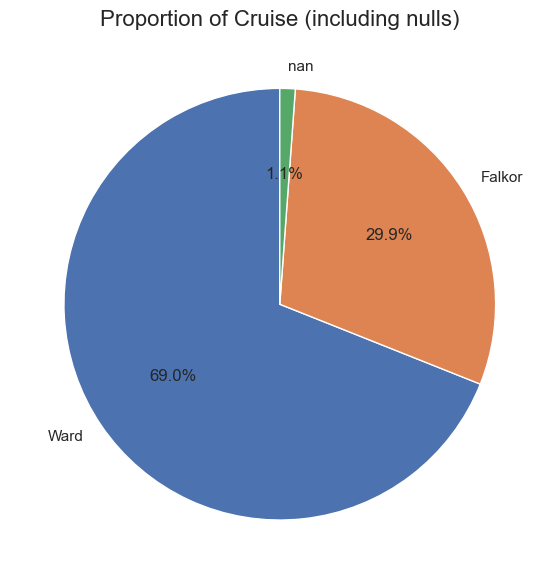

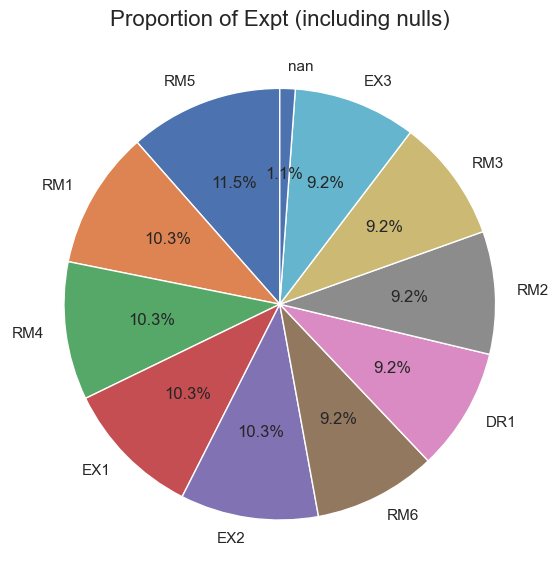

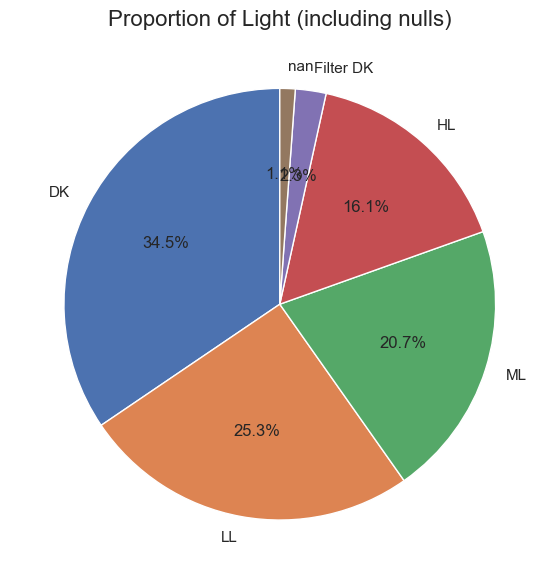

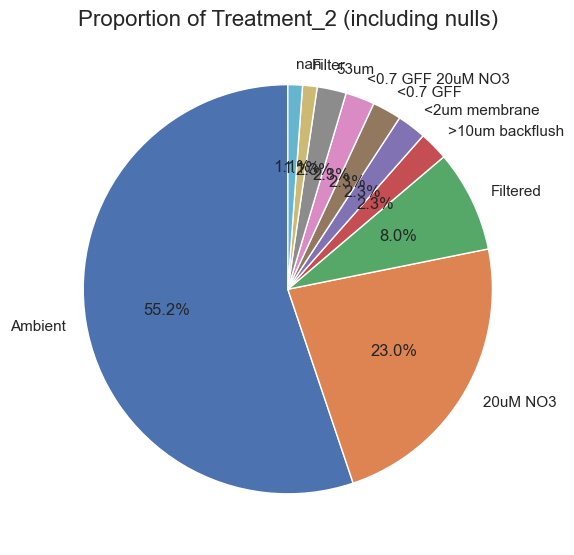

In [94]:
# Plotting pie charts for categorical columns, including null values
for col in categorical_cols:
    value_counts = df_experiment[col].value_counts(dropna=False)
    labels = [str(i) for i in value_counts.index]
    
    plt.figure(figsize=(6, 6))
    plt.pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'Proportion of {col} (including nulls)', size=16)
    plt.tight_layout()
    plt.show()

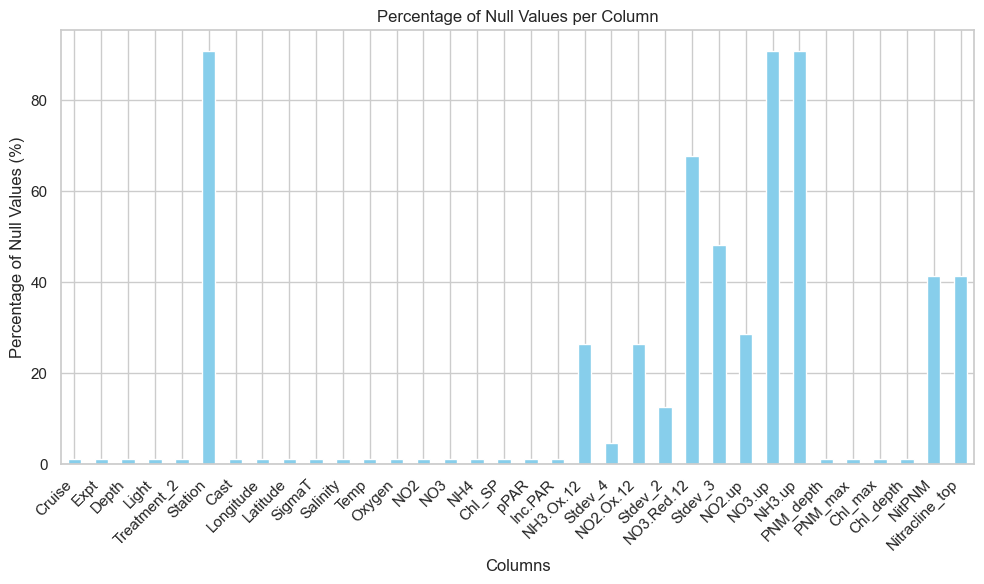

In [95]:
# Counting the percentage of null values per column
null_percentage = df_experiment.isnull().mean() * 100

# Plotting the percentage of null values per column
plt.figure(figsize=(10, 6))
null_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Null Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

### Tratamiento de valores nulos

El código se encarga de tratar los valores nulos en el DataFrame `df_experiment`. 

Primero, se define un umbral del 50% para identificar y eliminar aquellas columnas que tienen más del 50% de datos faltantes, ya que una gran cantidad de valores nulos podría sesgar los resultados y reducir la calidad del análisis. 
Luego, para las columnas restantes con menos del 50% de valores nulos, se realiza una imputación dependiendo del tipo de dato: 
- **columnas numéricas**: se reemplazan los valores faltantes con la media de la columna, preservando la tendencia central; 
- **para columnas categóricas**: se utiliza la moda (valor más frecuente) para imputar, manteniendo la proporción general de las categorías. 

Este proceso de preprocesamiento es crucial para asegurar que el conjunto de datos esté libre de valores nulos problemáticos, mejorando la calidad y fiabilidad de los modelos predictivos que se desarrollarán posteriormente.

In [96]:
# Definir el umbral del 50% para los valores nulos
threshold = 0.5

# Calcular el porcentaje de valores nulos en cada columna
missing_percentage = df_experiment.isnull().mean()

# 1. Eliminar las columnas que tienen más del 50% de valores nulos
cols_to_drop = missing_percentage[missing_percentage >= threshold].index
df_experiment = df_experiment.drop(columns=cols_to_drop)

# 2. Para las columnas con menos del 50% de valores nulos:
for col in df_experiment.columns:
    if df_experiment[col].isnull().sum() > 0:  # Si hay valores nulos
        if df_experiment[col].dtype in ['float64', 'int64']:  # Si la columna es numérica
            # Reemplazar los valores nulos con la media de la columna
            mean_value = df_experiment[col].mean()
            df_experiment[col].fillna(mean_value, inplace=True)
        elif df_experiment[col].dtype == 'object':  # Si la columna es categórica
            # Reemplazar los valores nulos con el valor más frecuente (moda)
            mode_value = df_experiment[col].mode()[0]
            df_experiment[col].fillna(mode_value, inplace=True)

# Ver el DataFrame modificado
df_experiment.head()

,Cruise,Expt,Depth,Light,Treatment_2,Cast,Longitude,Latitude,SigmaT,Salinity,...,NO2.Ox.12,Stdev_2,Stdev_3,NO2.up,PNM_depth,PNM_max,Chl_max,Chl_depth,NitPNM,Nitracline_top
0,Ward,RM1,60.0,DK,Filtered,17.0,113.0,10.0,23.86,34.39,...,27.991875,2.390000,3.22,5.21371,55.0,1.49,3.16,58.0,8.359412,48.72549
1,Ward,RM1,60.0,DK,Ambient,17.0,113.0,10.0,23.86,34.39,...,5.500000,5.145789,1.24,4.16000,55.0,1.49,3.16,58.0,8.359412,48.72549
2,Ward,RM1,60.0,LL,Ambient,17.0,113.0,10.0,23.86,34.39,...,8.090000,4.710000,0.22,5.44000,55.0,1.49,3.16,58.0,8.359412,48.72549
3,Ward,RM1,60.0,ML,Ambient,17.0,113.0,10.0,23.86,34.39,...,7.270000,2.770000,0.30,7.08000,55.0,1.49,3.16,58.0,8.359412,48.72549
4,Ward,RM1,60.0,HL,Ambient,17.0,113.0,10.0,23.86,34.39,...,13.050000,2.740000,0.42,5.93000,55.0,1.49,3.16,58.0,8.359412,48.72549


## Planteamiento del problema de clasificación

### Objetivo:
El objetivo de este análisis es construir un modelo de clasificación multiclase que permita predecir la categoría de la variable **"Light"** (que representa las condiciones de luz bajo las cuales se realizaron las mediciones) utilizando como entrada una serie de características físico-químicas y geográficas del entorno.

### Variable Objetivo:
- **"Light"**: Esta variable representa las condiciones de luz en las que se tomaron las muestras, y es categórica. Las posibles clases incluyen diferentes niveles y combinaciones de intensidad lumínica, como DK, LL, ML, y HL. El objetivo es predecir en qué condición de luz se encontraba cada muestra utilizando las características restantes del conjunto de datos.

### Variables Predictoras:
Las variables predictoras utilizadas para esta clasificación incluyen características físico-químicas y geográficas del entorno, que podrían influir en la condición de luz registrada. Algunas de estas variables son:
- **Características Físicas y Químicas:**
  - `Depth`: Profundidad de la muestra.
  - `SigmaT`: Densidad del agua (kg/m^3).
  - `Salinity`: Salinidad del agua (psu).
  - `Temp`: Temperatura del agua (°C).
  - `Oxygen`: Concentración de oxígeno disuelto (μmol/kg).
  - `NO2`, `NO3`, `NH4`: Concentraciones de diferentes compuestos nitrogenados (μmol/kg).
  - `Chl_SP`: Concentración de clorofila a (mg/m^3).
  - `pPAR`, `Inc.PAR`: Parámetros relacionados con la radiación fotosintéticamente activa.
  - `NH3.Ox.12`, `NO2.Ox.12`: Medidas específicas de oxidación de compuestos de nitrógeno.

- **Características Geográficas:**
  - `Longitude`: Longitud geográfica del sitio de muestreo.
  - `Latitude`: Latitud geográfica del sitio de muestreo.

### Justificación:
La selección de estas variables se basa en la hipótesis de que las condiciones de luz están directamente relacionadas con factores ambientales y químicos presentes en el agua, así como con la ubicación geográfica de las muestras. Comprender estas relaciones puede proporcionar *insights* valiosos sobre cómo las condiciones ambientales afectan la distribución de luz en diferentes entornos y, en última instancia, permitir la clasificación precisa de estas condiciones lumínicas.

1. Comenzamos evaluando la distribución de la variable objetivo "Light" para entender el balance de clases y luego se separa esta variable (y) de las características predictoras (X). 

2. Se utiliza `LabelEncoder` para transformar las etiquetas categóricas de "Light" en valores numéricos, y se aplican variables dummy a las características categóricas en X para convertirlas en representaciones numéricas adecuadas para los algoritmos de machine learning. 

3. Luego, se divide el conjunto de datos en entrenamiento (80%) y prueba (20%) usando `train_test_split`, asegurando que los datos de prueba sean distintos a los de entrenamiento. 

4. Se definen tres modelos a evaluar (K-Nearest Neighbors, Naive Bayes y Linear Discriminant Analysis) y se ejecuta validación cruzada de 5 pliegues (`cross_val_score`) para cada uno, almacenando la media de precisión obtenida. Se identifica el modelo con mejor rendimiento y se entrena usando los datos de entrenamiento, evaluando su desempeño final en el conjunto de prueba. 

5. Por último, se imprime un reporte detallado de las métricas de clasificación (precisión, recall y F1-score) del mejor modelo, proporcionando un análisis exhaustivo de su capacidad predictiva.


In [97]:
df_experiment["Light"].value_counts(normalize=True)

Light
DK           0.356322
LL           0.252874
ML           0.206897
HL           0.160920
Filter DK    0.022989
Name: proportion, dtype: float64

In [98]:
df_experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cruise          87 non-null     object 
 1   Expt            87 non-null     object 
 2   Depth           87 non-null     float64
 3   Light           87 non-null     object 
 4   Treatment_2     87 non-null     object 
 5   Cast            87 non-null     float64
 6   Longitude       87 non-null     float64
 7   Latitude        87 non-null     float64
 8   SigmaT          87 non-null     float64
 9   Salinity        87 non-null     float64
 10  Temp            87 non-null     float64
 11  Oxygen          87 non-null     float64
 12  NO2             87 non-null     float64
 13  NO3             87 non-null     float64
 14  NH4             87 non-null     float64
 15  Chl_SP          87 non-null     float64
 16  pPAR            87 non-null     float64
 17  Inc.PAR         87 non-null     float

In [99]:
# Separar las características (X) y la variable objetivo (y)
# Aquí asumo que "Light" es la columna objetivo a predecir
X = df_experiment.drop('Light', axis=1)
y = df_experiment['Light']

In [100]:
# Convertir variables categóricas a numéricas si es necesario
# Usar LabelEncoder para las etiquetas si no están en formato numérico
le = LabelEncoder()
y = le.fit_transform(y)

In [101]:
# Convertir las columnas categóricas en variables dummy utilizando pd.get_dummies()
X = pd.get_dummies(X, drop_first=True)

In [108]:
# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [109]:
# Definir los modelos a probar
modelos = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "LDA (Linear Discriminant Analysis)": LinearDiscriminantAnalysis()
}

# Diccionario para almacenar los resultados
resultados = {}

# Evaluar cada modelo con cross-validation
for nombre, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
    resultados[nombre] = scores.mean()

# Imprimir los resultados
for nombre, score in resultados.items():
    print(f"{nombre}: {score:.4f}")

# Entrenar y evaluar el mejor modelo
mejor_modelo = max(resultados, key=resultados.get)
print(f"\nMejor modelo: {mejor_modelo}")

modelo_final = modelos[mejor_modelo]
modelo_final.fit(X_train, y_train)
y_pred = modelo_final.predict(X_test)

# Mostrar métricas del mejor modelo
print("\nReporte de clasificación del mejor modelo:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

K-Nearest Neighbors: 0.2022
Naive Bayes: 0.4352
LDA (Linear Discriminant Analysis): 0.9714

Mejor modelo: LDA (Linear Discriminant Analysis)

Reporte de clasificación del mejor modelo:
              precision    recall  f1-score   support

          DK       0.75      1.00      0.86         3
   Filter DK       0.00      0.00      0.00         1
          HL       1.00      1.00      1.00         4
          LL       1.00      1.00      1.00         6
          ML       1.00      1.00      1.00         4

    accuracy                           0.94        18
   macro avg       0.75      0.80      0.77        18
weighted avg       0.90      0.94      0.92        18



C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\52552\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages

## Análisis de resultados

Los resultados muestran que el mejor modelo para predecir las condiciones de luz ("Light") es el Análisis Discriminante Lineal (LDA), con una precisión media de validación cruzada del 97.14%, superando significativamente a los otros modelos probados (K-Nearest Neighbors con 20.22% y Naive Bayes con 43.52%).

 El reporte de clasificación final del modelo LDA en el conjunto de prueba refleja un alto desempeño, con una precisión general del 94%. 
 
 La clase "Filter DK" muestra un rendimiento pobre, con precisión, recall y F1-score de 0, lo cual podría deberse a la falta de suficientes muestras en esa clase, evidenciada por el bajo soporte (n=1). Para las otras clases, como "HL", "LL" y "ML", el modelo alcanza una precisión, recall y F1-score perfectos de 1.0, indicando que el modelo clasifica estas categorías sin errores en el conjunto de prueba. La métrica "macro avg" muestra un promedio no ponderado de las métricas, reflejando el problema del modelo en la clase minoritaria "Filter DK", mientras que "weighted avg" pondera por el número de muestras en cada clase, mostrando un desempeño robusto del modelo generalizado. 
 
 Estos resultados sugieren que LDA es altamente efectivo para este problema, aunque es importante considerar el desbalance de clases y la baja representatividad de algunas categorías al interpretar su desempeño.

